In [2]:
import pandas as pd
import numpy as np

In [5]:
c = pd.read_csv("../data/trash_can_data.csv")
cans = c.iloc[:,[9]].sort_values("neighborhood").dropna()

#Pulling in trees data to get all 90 neighborhoods (cans data only has 79 neighborhoods)
t = pd.read_csv("../data/trees_data.csv").dropna().sort_values('neighborhood')
n = t['neighborhood'].unique().tolist()

C:\Users\Max\anaconda3\envs\cmpinf0010\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:xlabel='Neighborhood'>

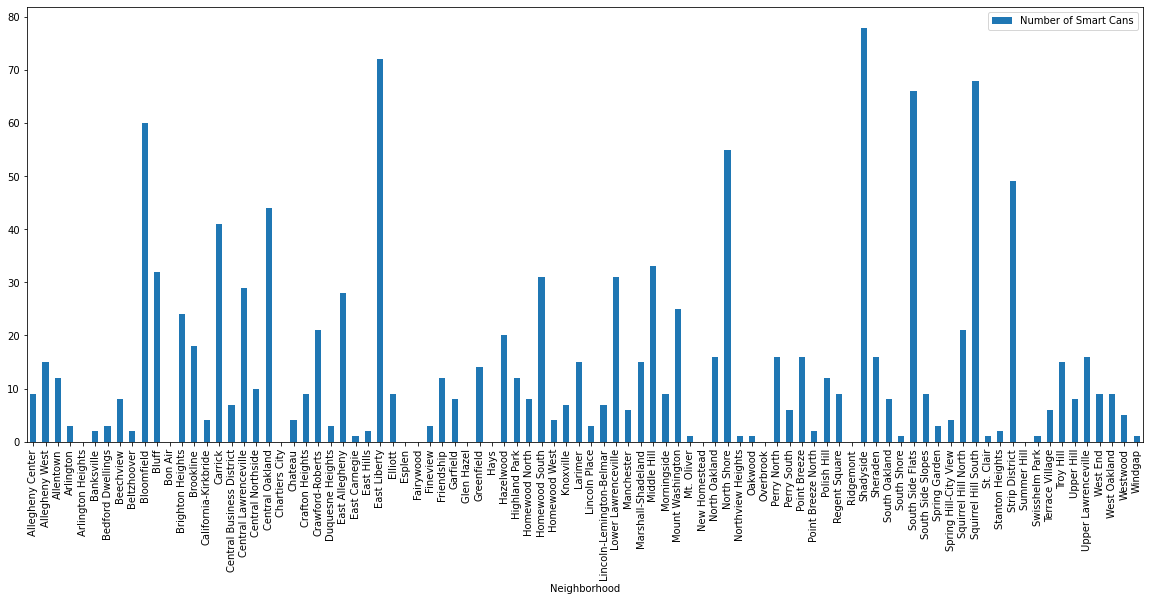

In [6]:
total = []
for r in range(90) :
    total.append(0)

for r in range(len(cans)) :
    neighborhood = cans.iloc[r,0]
    i = n.index(neighborhood)
    total[i]+=1
    
numCans = [[]]
for i in range(90) :
    numCans[i].append(n[i])
    numCans[i].append(total[i])
    
    numCans.insert(i+1, [])
    
del numCans[90]

totalCans = pd.DataFrame(numCans, columns=['Neighborhood', 'Number of Smart Cans'])
totalCans.plot.bar(x="Neighborhood", figsize=(20,8))

In [7]:
ranked = totalCans.sort_values("Number of Smart Cans")
rankList = []
for r in range(90) :
    rankList.append(0)

for r in range(90) :
    i = ranked.index.tolist()
    rankList[i[r]] = (90-r)
    
numCans = [[]]
for i in range(90) :
    numCans[i].append(n[i])
    numCans[i].append(rankList[i])
    
    numCans.insert(i+1, [])
    
del numCans[90]

canRank = pd.DataFrame(numCans, columns = ['Neighborhood', 'Ranking'])
canRank = canRank.sort_values('Ranking')

canRank

,Neighborhood,Ranking
67,Shadyside,1
28,East Liberty,2
76,Squirrel Hill South,3
71,South Side Flats,4
9,Bloomfield,5
...,...,...
4,Arlington Heights,86
37,Hays,87
54,New Homestead,88
59,Overbrook,89
